# ASSIGNMENT ON LINEAR REGRESSION (DEMAND FOR SHARED BIKES)

### SUBMITTED BY MALINI S

### To build a multiple linear regression model for the prediction of demand for shared bikes


## Step 1: Importing required libraries

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step 2 : Reading and understanding the dataset

#### a. Loading the dataset

In [2]:
# Load the dataset
bike_df=pd.read_csv("day.csv")

#### b. Inspecting the dataset

In [3]:
# 1.a. checking the first five rows of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# 1.b. checking the last five rows of the dataset
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# 2. Total number of rows and columns
bike_df.shape
# number of rows are 730 and number of columns are 16

(730, 16)

In [6]:
# 3. checking the name of the columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# 4. Information about the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# 5.Checking the statistical values of numerical data
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 3: Cleaning the data

#### 3.a. Checking for null values

In [9]:
# Checking for null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

• There are no null values in the dataset

#### 3. b. Renaming the columns

In [10]:
# Renaming the columns for readableness
bike_df=bike_df.rename(columns={"yr":"year","mnth":"month","weathersit":"weather","hum":"humidity","cnt":"count"})
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 3. c. Dropping unnecessary columns

In [11]:
# dropping unnecessary columns
# instant column refers only row indices so it could be dropped
bike_df.drop(["instant"],axis=1,inplace=True)


In [12]:
#dteday column value are present in month and weekday so it could be dropped
bike_df.drop(["dteday"],axis=1,inplace=True)

In [13]:
#casual column value are present in count so it could be dropped
bike_df.drop(["casual"],axis=1,inplace=True)

In [14]:
#registered column value are present in count so it could be dropped
bike_df.drop(["registered"],axis=1,inplace=True)

In [15]:
#checking the first five rows 
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#checking unique  values
bike_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weather         3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

The columns like season, year, month, holiday, weekday, workingday, weather should be categorical variable.
Other columns namely, temp, atemp, humidity, windspeed, casual, registered, count are numerical variables. 


#### 3.d. Converting few columns into categorical variables

In [17]:
# converting season, year, month, holiday, weekday, working day and weather into categorical variables
bike_df['season']=bike_df['season'].astype('category')
bike_df['year']=bike_df['year'].astype('category')
bike_df['month']=bike_df['month'].astype('category')
bike_df['holiday']=bike_df['holiday'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df['workingday']=bike_df['workingday'].astype('category')
bike_df['weather']=bike_df['weather'].astype('category')

In [18]:
# Checking dtypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


## Step 4: Data Visualization

### Data Visualization

The target variable is count or casual or registered. Lets check for different attributes (categorical variables) with target variable.

#### 4. a. Categorical Analysis

[Text(0.5, 1.0, 'Bike count on weekdays')]

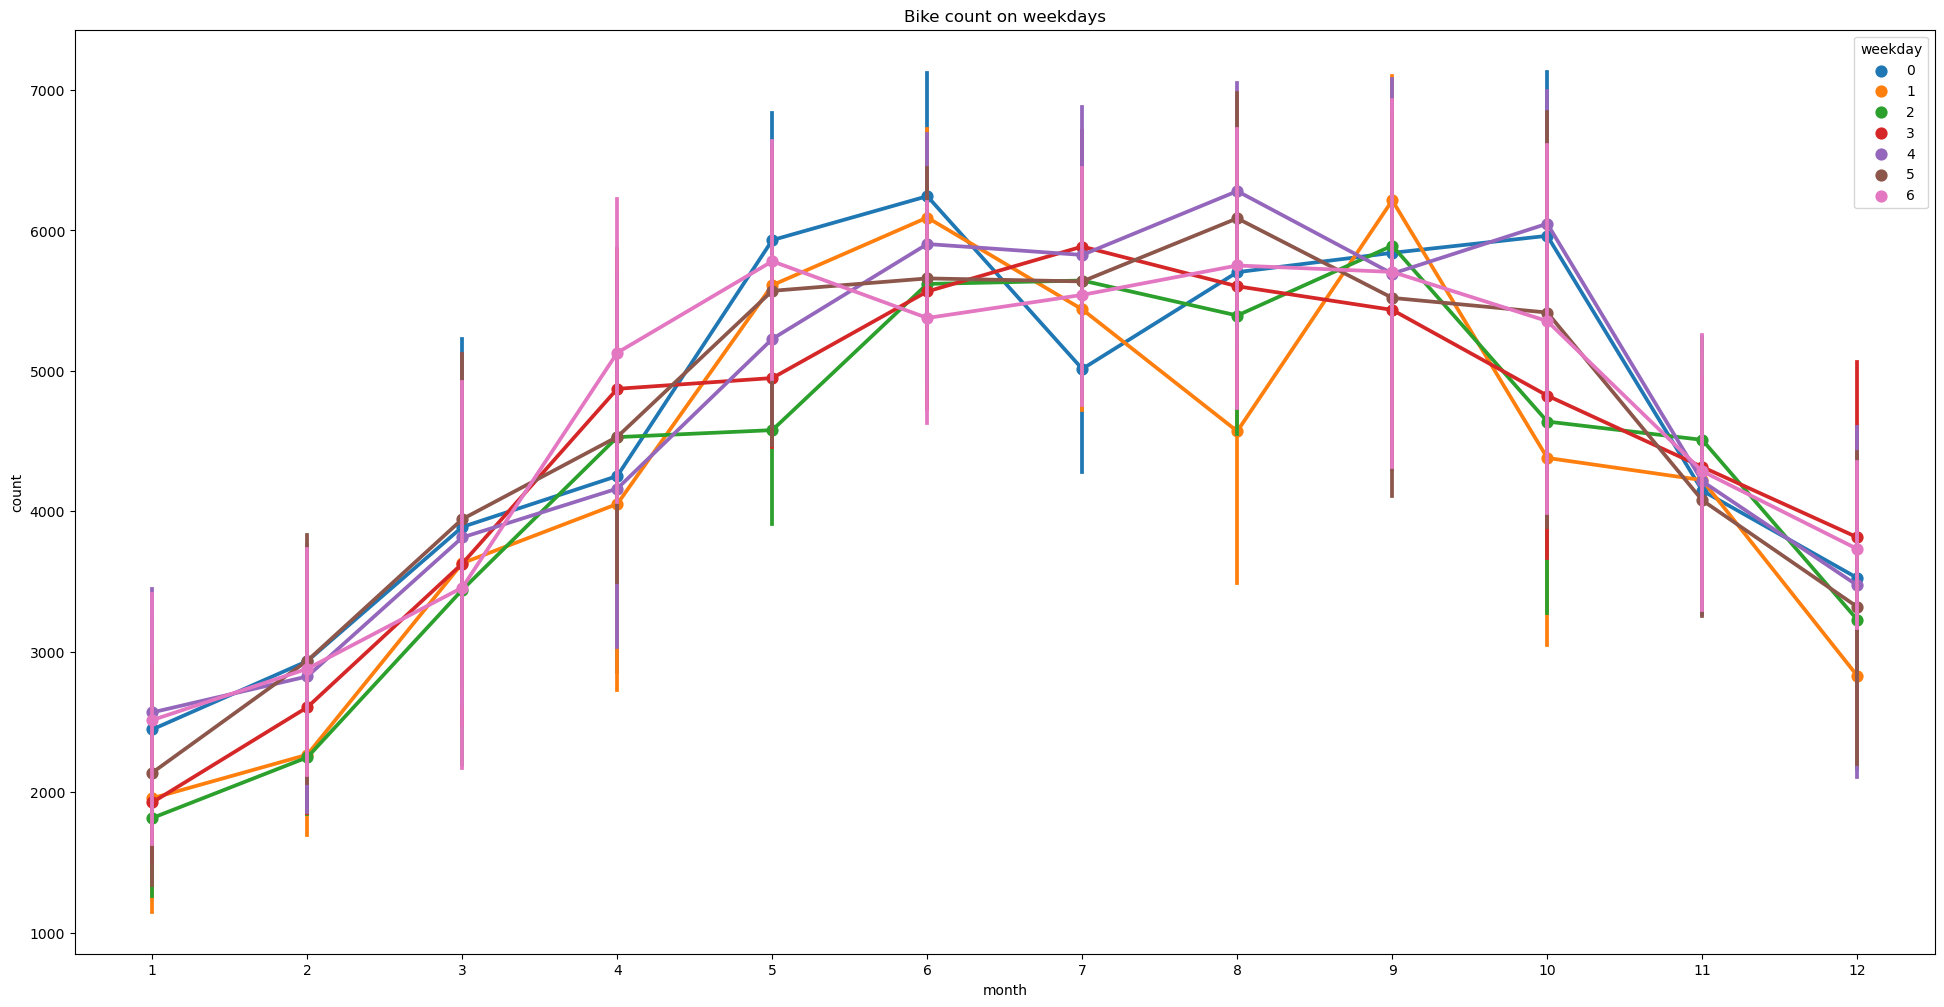

In [19]:
# Month Vs Count Vs weekday
fig, ax = plt.subplots(figsize=(24,12))
sns.pointplot(data=bike_df, x='month', y='count', hue='weekday', ax=ax)
ax.set(title="Bike count on weekdays")
# as per assignment data dictionary, weekday : day of the week, 0:sunday,1:monday,2:tuesday,3:wednesday,4:thursday,5:friday,6:saturday
# as per assignment data dictionary, mnth : month ( 1 to 12), 1:jan,2:feb,3:mar,4:apr,5:may,6:jun,7:jul,8:aug,9:sep,10:oct,11:nov,12:dec
# as per assignment data dictionary,0:2018 and 1: 2019

[Text(0.5, 1.0, 'Total bike users for year')]

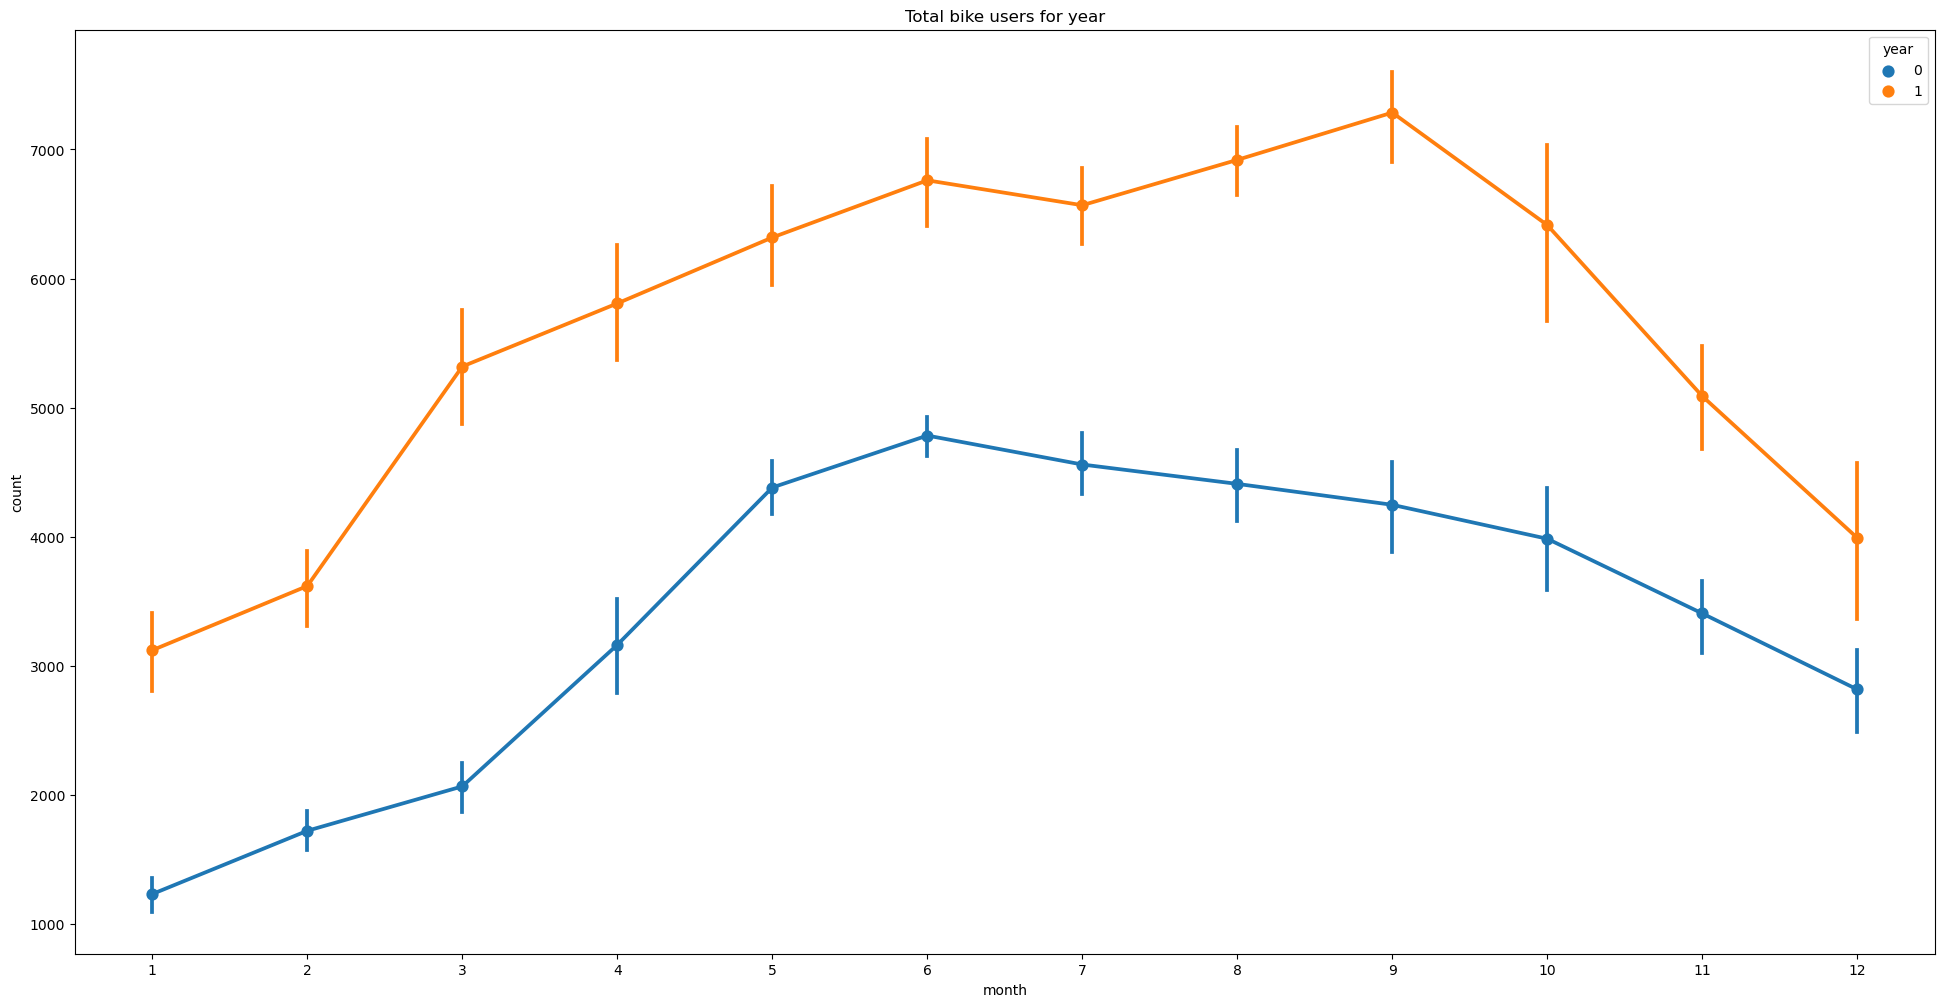

In [20]:
# Month Vs Count Vs year
fig, ax = plt.subplots(figsize=(24,12))
sns.pointplot(data=bike_df, x='month', y='count', hue='year', ax=ax)
ax.set(title="Total bike users for year")

• The number of bike users is higher in 2019 than in the year 2018, so the business has improved

[Text(0.5, 1.0, 'Total bike users on a Workingday')]

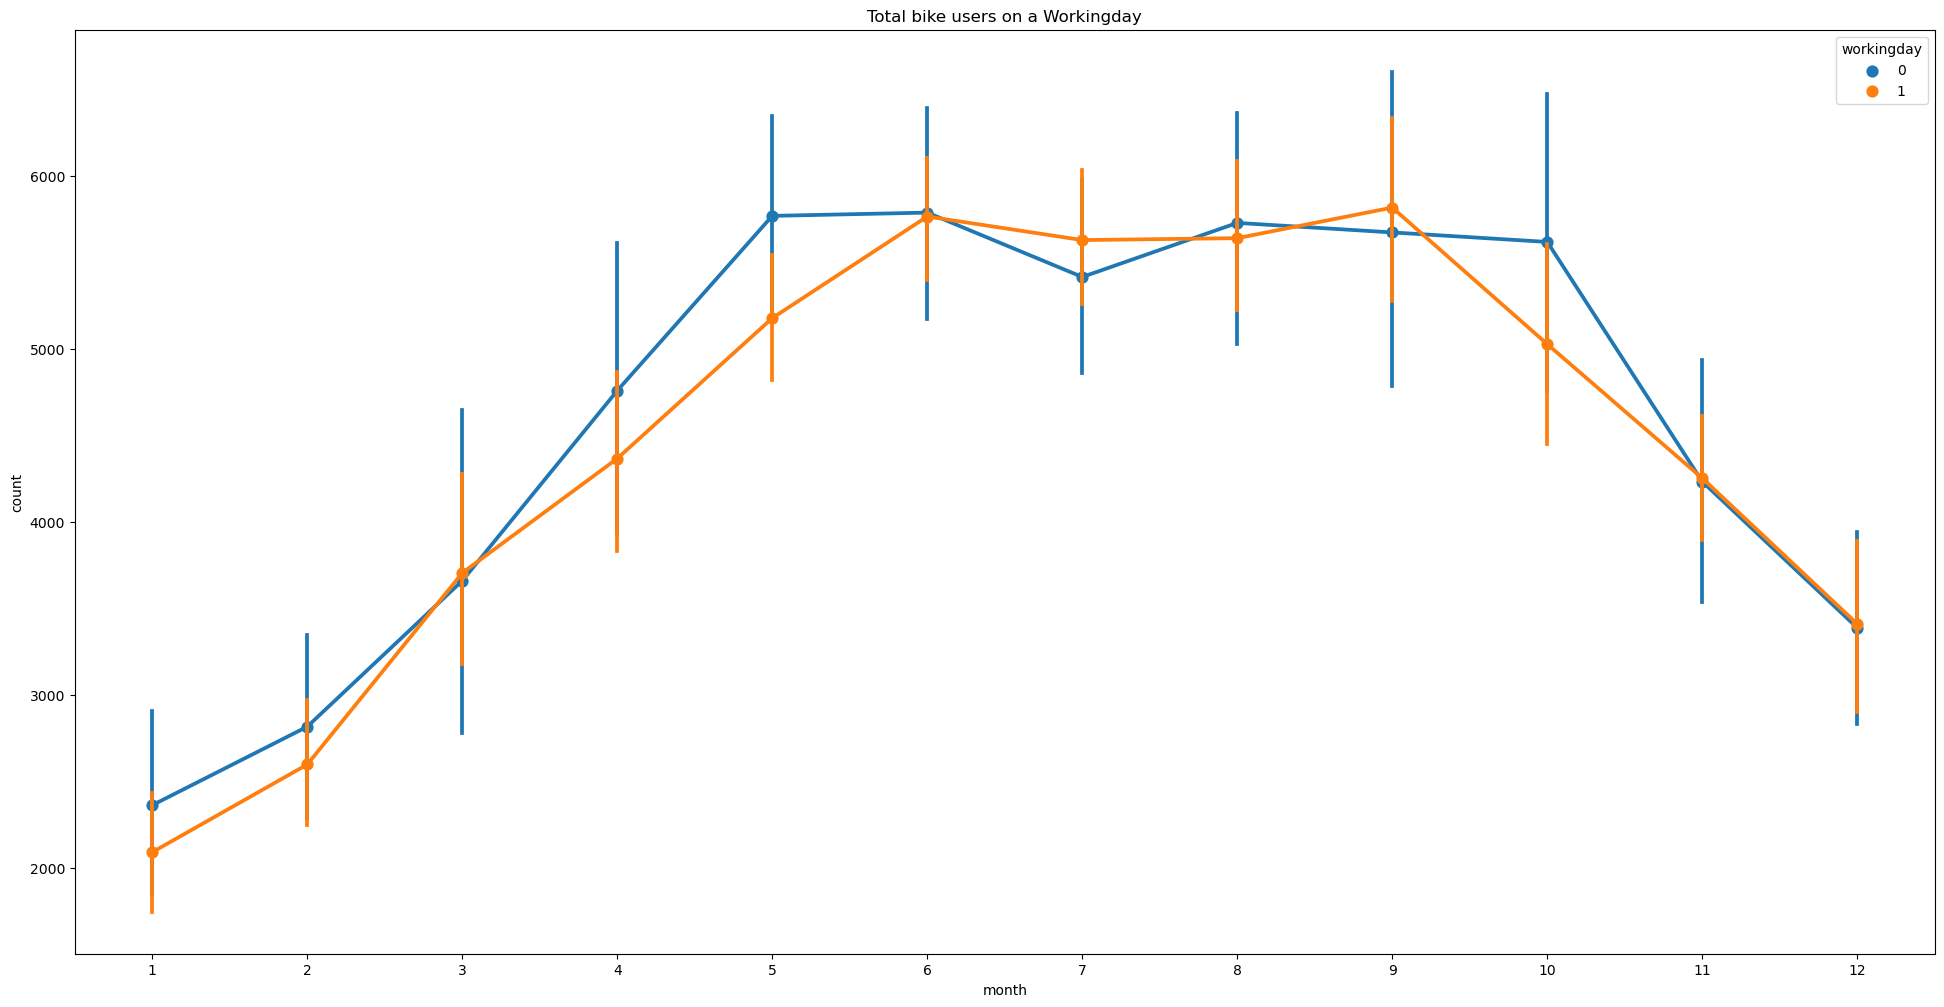

In [21]:
# Month Vs Count Vs workingday
fig, ax = plt.subplots(figsize=(24,12))
sns.pointplot(data=bike_df, x='month', y='count', hue='workingday', ax=ax)
ax.set(title="Total bike users on a Workingday")
# as per assignment data dictionary,workingday : if day is neither weekend nor holiday is 1, otherwise is 0. hence 0:workingday and 1:non-working day

• The number of bike users is almost the same in both working days and in non-working days.

[Text(0.5, 1.0, 'Total bike users during seasons')]

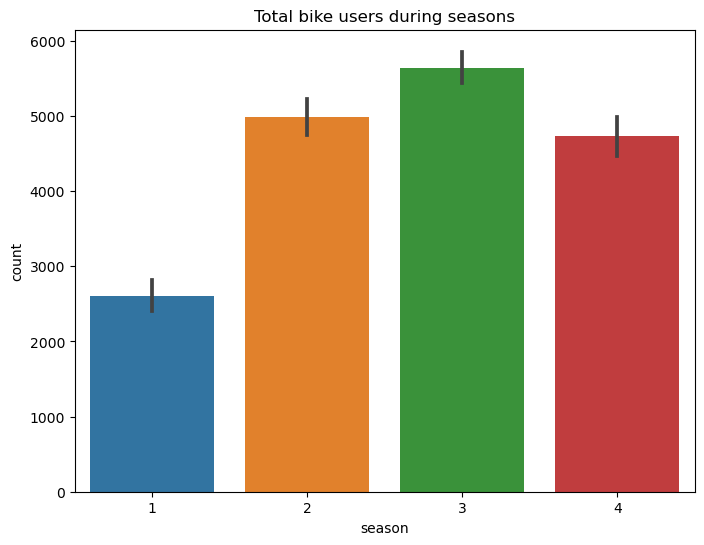

In [22]:
# Season Vs Count
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df, x='season', y='count')
ax.set(title="Total bike users during seasons")
#as per assignment data dictionary,season : season (1:spring, 2:summer, 3:fall, 4:winter)

[Text(0.5, 1.0, 'Total bike users during weather')]

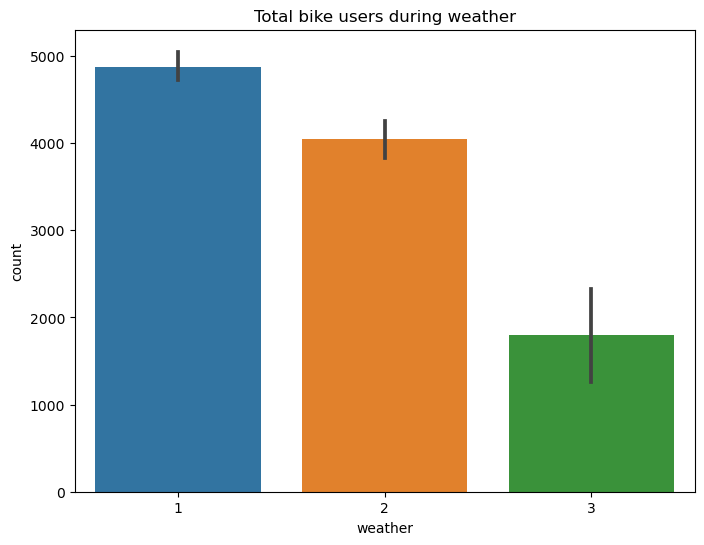

In [23]:
# Weather Vs count
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df, x='weather', y='count')
ax.set(title="Total bike users during weather")
#as per assignment data dictionary, weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


#### 4. b. Numerical Analysis

[Text(0.5, 1.0, 'temp Vs No. of users')]

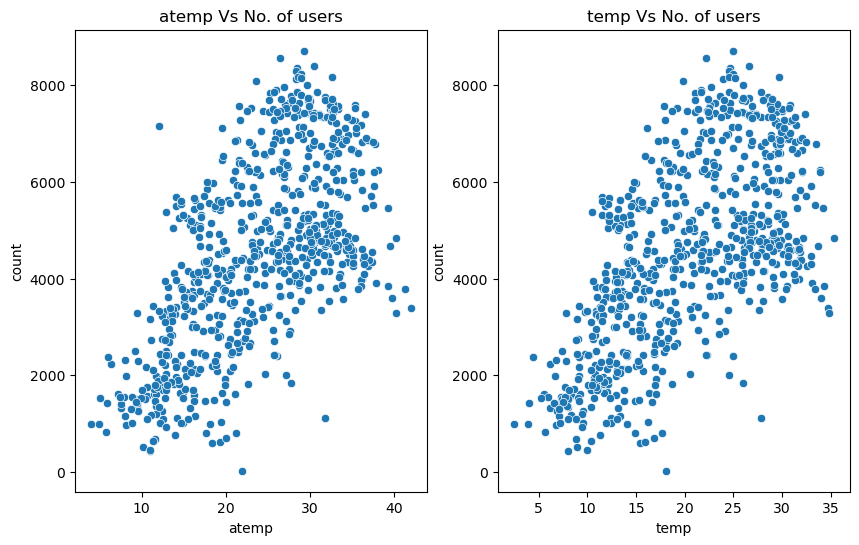

In [24]:
# Temp Vs count
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))
sns.scatterplot(data=bike_df,x="atemp",y="count",ax=ax1)
ax1.set(title="atemp Vs No. of users")
sns.scatterplot(data=bike_df,x="temp",y="count",ax=ax2)
ax2.set(title="temp Vs No. of users")

• Hence, when temperature increases, the number of users also increases.

[Text(0.5, 1.0, 'Windspeed Vs No. of users')]

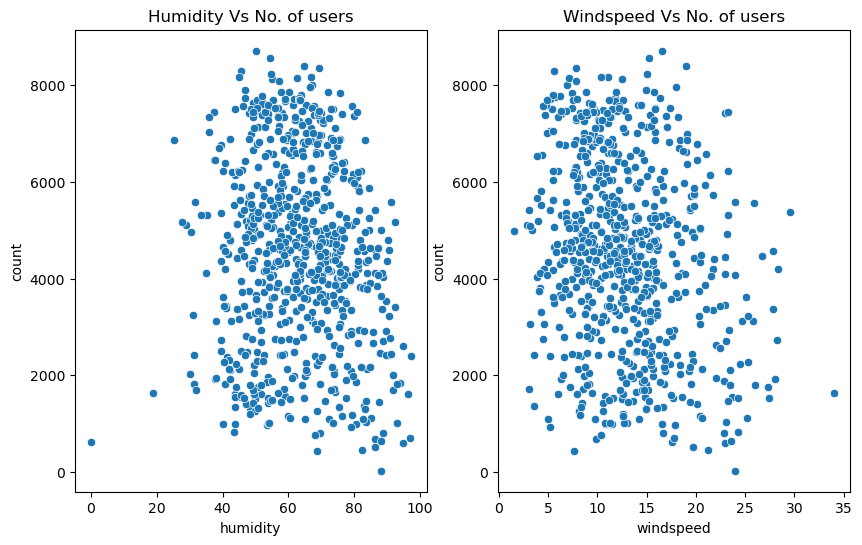

In [25]:
# Humidity Vs Count
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))
sns.scatterplot(data=bike_df,x="humidity",y="count",ax=ax1)
ax1.set(title="Humidity Vs No. of users")
sns.scatterplot(data=bike_df,x="windspeed",y="count",ax=ax2)
ax2.set(title="Windspeed Vs No. of users")

• When humidity increases, the number of users starts decreasing.

#### 4. C. CORRELATION MATRIX

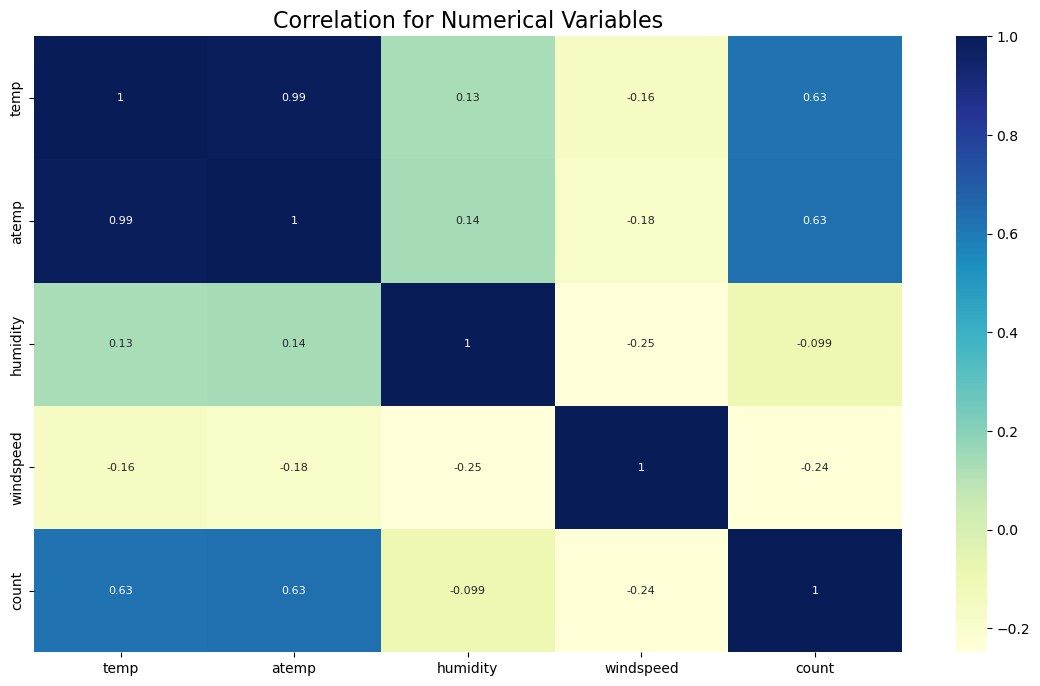

In [26]:
# Correalation matrix
plt.figure(figsize=(14,8))
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot=True,annot_kws={"size":8})
plt.title("Correlation for Numerical Variables",fontsize=16)
plt.show()

## Step 5: Data Preparation for Modelling

 • There are no yes/no variables here.

### 5.a Creation of dummy variables

In [27]:
# Creation of dummy variables
season_df=pd.get_dummies(bike_df["season"],prefix='season', drop_first=True)
month_df=pd.get_dummies(bike_df["month"],prefix='month', drop_first=True)
weekday_df=pd.get_dummies(bike_df["weekday"],prefix='weekday', drop_first=True)
weather_df=pd.get_dummies(bike_df["weather"], prefix='weather')

In [28]:
# Merging the dataframe with dummy dataframe
bike_df_new=pd.concat([bike_df,season_df,month_df,weekday_df,weather_df],axis=1)

In [29]:
# Check the first five rows in the new dataframe
bike_df_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,1,0,0


In [30]:
# Checking the column details
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
 12  season_2    730 non-null    uint8   
 13  season_3    730 non-null    uint8   
 14  season_4    730 non-null    uint8   
 15  month_2     730 non-null    uint8   
 16  month_3     730 non-null    uint8   
 17  month_4     730 non-null    uint8   
 18  month_5     730 non-null    uint8   
 19  month_6 

In [31]:
#Removing the unnecessary columns
bike_df_new.drop(["season","month","weekday","weather"],axis=1,inplace=True)

In [32]:
#Checking the first five rows in the new dataframe
bike_df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,1,0,0


In [33]:
# Checking the column values in the new dataframe
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        730 non-null    category
 1   holiday     730 non-null    category
 2   workingday  730 non-null    category
 3   temp        730 non-null    float64 
 4   atemp       730 non-null    float64 
 5   humidity    730 non-null    float64 
 6   windspeed   730 non-null    float64 
 7   count       730 non-null    int64   
 8   season_2    730 non-null    uint8   
 9   season_3    730 non-null    uint8   
 10  season_4    730 non-null    uint8   
 11  month_2     730 non-null    uint8   
 12  month_3     730 non-null    uint8   
 13  month_4     730 non-null    uint8   
 14  month_5     730 non-null    uint8   
 15  month_6     730 non-null    uint8   
 16  month_7     730 non-null    uint8   
 17  month_8     730 non-null    uint8   
 18  month_9     730 non-null    uint8   
 19  month_10

### 5.b Splitting the Data into Train and Test Sets

In [34]:
# Splitting into training set and testing set
df_train,df_test=train_test_split(bike_df_new,train_size=0.7,random_state=100)

In [35]:
# Checking the shape of the training set
df_train.shape

(510, 31)

In [36]:
# Checking the shape of the testing set
df_test.shape

(220, 31)

### 5.c. Rescaling

In [37]:
# Instantiate an object
scaler=MinMaxScaler()

In [38]:
# checking the first five rows
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Create a list of numerical variables
num_vars=["temp","atemp","humidity","windspeed","count"]

In [40]:
# Fit_transform on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [41]:
# Check the first five rows in df_train
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Check min and max value using describe()
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


Hence, the min and max values for num_vars are 0 and 1 when used MinMaxScaler

## Step 6: Training the Model

### a. Dividing into X and Y sets for the model building

In [43]:
#Training datasets
X_train=df_train
y_train=df_train.pop("count")

In [44]:
# Checking the first five row values of X_train
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
# Checking the first five rows of y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

### b. Building the model by Recursive Feature Elimination (RFE)

In [46]:
X_train.columns = X_train.columns.astype(str)

In [47]:
# Running RFE with output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
# fit the model 
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [49]:
# Features with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 12),
 ('month_3', True, 1),
 ('month_4', False, 4),
 ('month_5', False, 2),
 ('month_6', False, 3),
 ('month_7', False, 13),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 14),
 ('month_12', False, 15),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 9),
 ('weekday_4', False, 7),
 ('weekday_5', False, 8),
 ('weekday_6', False, 16),
 ('weather_1', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

In [50]:
# RFE selected features
col=X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_3', 'month_8', 'month_9', 'month_10',
       'weather_1', 'weather_2', 'weather_3'],
      dtype='object')

In [51]:
# features not taken into consideration
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_2', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### c .Building model using statsmodel, for the detailed statistics

### Model 1

In [52]:
# creating X_test dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [53]:
# adding a constant variable
X_train_rfe=sm.add_constant(X_train_rfe)

In [54]:
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [55]:
#checking the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.46e-189
Time:                        21:57:32   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.024      4.093      0.000       0.052       0.147
year           0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
humidity      -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_2       0.1225      0.015      8.137      0.000       0.093       0.152
season_3       0.0361      0.023      1.593      0.112      -0.008       0.081
season_4       0.1502      0.014     10.671      0.000       0.123       0.178
month_3        0.0279      0.014      1.931      0.054      -0.000       0.056
month_8        0.0505      0.018      2.883      0.004       0.016       0.085
month_9        0.1202      0.017      6.946      0.000       0.086       0.154
month_10       0.0393      0.018      2.231      0.026       0.005       0.074
weather_1      0.1329      0.008     15.721      0.000       0.116       0.149
weather_2      0.0785      0.011      6.994      0.000       0.056       0.101
weather_3     -0.1120      0.022     -5.121      0.000      -0.155      -0.069
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                     9.79e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

• There is a strong multicollinearity, so VIF value to be calculated

In [56]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,weather_1,inf
14,weather_2,inf
15,weather_3,inf
7,season_3,6.29
3,temp,3.72
6,season_2,2.66
8,season_4,2.33
4,humidity,1.90
10,month_8,1.68
12,month_10,1.51


Here VIF values are infinte for weather_1, weather_2, weather_3

### Model 2

In [57]:
#Since VIF for weather_1 is infinty, its better to drop
X_train_rfe = X_train_rfe.drop("weather_1",axis=1)
X_train_rfe.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_3', 'month_8', 'month_9', 'month_10',
       'weather_2', 'weather_3'],
      dtype='object')

In [58]:
# Adding constant to the model
X_train_new=sm.add_constant(X_train_rfe)
# Running the linear model
lm_1=sm.OLS(y_train,X_train_new).fit()
# Checking the summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.46e-189
Time:                        21:57:32   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.525      0.000       0.179       0.286
year           0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
humidity      -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_2       0.1225      0.015      8.137      0.000       0.093       0.152
season_3       0.0361      0.023      1.593      0.112      -0.008       0.081
season_4       0.1502      0.014     10.671      0.000       0.123       0.178
month_3        0.0279      0.014      1.931      0.054      -0.000       0.056
month_8        0.0505      0.018      2.883      0.004       0.016       0.085
month_9        0.1202      0.017      6.946      0.000       0.086       0.154
month_10       0.0393      0.018      2.231      0.026       0.005       0.074
weather_2     -0.0544      0.010     -5.199      0.000      -0.075      -0.034
weather_3     -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,46.85
7,season_3,6.29
3,temp,3.72
6,season_2,2.66
8,season_4,2.33
4,humidity,1.90
10,month_8,1.68
13,weather_2,1.56
12,month_10,1.51
11,month_9,1.40


• season_3 has more VIF and p-value is 0.112, so it should be dropped

### Model 3

In [60]:
#Since VIF for season_3 is more than 5 and p-value is 0.112, its better to drop
X_train_rfe = X_train_rfe.drop("season_3",axis=1)
X_train_rfe.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_2',
       'season_4', 'month_3', 'month_8', 'month_9', 'month_10', 'weather_2',
       'weather_3'],
      dtype='object')

In [61]:
#adding constant to the model
X_train_new_1=sm.add_constant(X_train_rfe)
## Running the linear model
lm_2=sm.OLS(y_train,X_train_new_1).fit()
#checking the summary
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          5.94e-190
Time:                        21:57:33   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2326      0.027      8.525      0.000       0.179       0.286
year           0.2287      0.008     28.289      0.000       0.213       0.245
holiday       -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp           0.5371      0.023     23.855      0.000       0.493       0.581
humidity      -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed     -0.1893      0.026     -7.388      0.000      -0.240      -0.139
season_2       0.1059      0.011      9.743      0.000       0.085       0.127
season_4       0.1393      0.012     11.304      0.000       0.115       0.163
month_3        0.0233      0.014      1.642      0.101      -0.005       0.051
month_8        0.0605      0.016      3.699      0.000       0.028       0.093
month_9        0.1292      0.016      7.897      0.000       0.097       0.161
month_10       0.0355      0.017      2.032      0.043       0.001       0.070
weather_2     -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weather_3     -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features']=X_train_new_1.columns
vif["VIF"]=[variance_inflation_factor(X_train_new_1.values,i) for i in range(X_train_new_1.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,46.85
4,humidity,1.86
7,season_4,1.78
3,temp,1.62
12,weather_2,1.55
11,month_10,1.48
9,month_8,1.46
6,season_2,1.38
10,month_9,1.25
13,weather_3,1.24


### Model 4

In [63]:
# since p value of month_3 is 0.101, it should be dropped
X_train_rfe = X_train_rfe.drop("month_3",axis=1)
X_train_rfe.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_2',
       'season_4', 'month_8', 'month_9', 'month_10', 'weather_2', 'weather_3'],
      dtype='object')

In [64]:
#adding constant to the model
X_train_new_2=sm.add_constant(X_train_rfe)
#running the linear model
lm_3=sm.OLS(y_train,X_train_new_2).fit()
#checking the summary
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          1.49e-190
Time:                        21:57:33   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.027      8.838      0.000       0.186       0.292
year           0.2289      0.008     28.264      0.000       0.213       0.245
holiday       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp           0.5316      0.022     23.836      0.000       0.488       0.575
humidity      -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed     -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_2       0.1058      0.011      9.719      0.000       0.084       0.127
season_4       0.1353      0.012     11.180      0.000       0.112       0.159
month_8        0.0585      0.016      3.583      0.000       0.026       0.091
month_9        0.1277      0.016      7.803      0.000       0.096       0.160
month_10       0.0358      0.018      2.046      0.041       0.001       0.070
weather_2     -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weather_3     -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features']=X_train_new_2.columns
vif["VIF"]=[variance_inflation_factor(X_train_new_2.values,i) for i in range(X_train_new_2.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,45.88
4,humidity,1.86
7,season_4,1.71
3,temp,1.59
11,weather_2,1.55
10,month_10,1.48
8,month_8,1.45
6,season_2,1.38
9,month_9,1.24
12,weather_3,1.24


### d. Checking the assumptions of error terms 

In [66]:
# calculation of error in prediction for Training Data
y_train_pred=lm_3.predict(X_train_new_2)
resid=(y_train-y_train_pred)

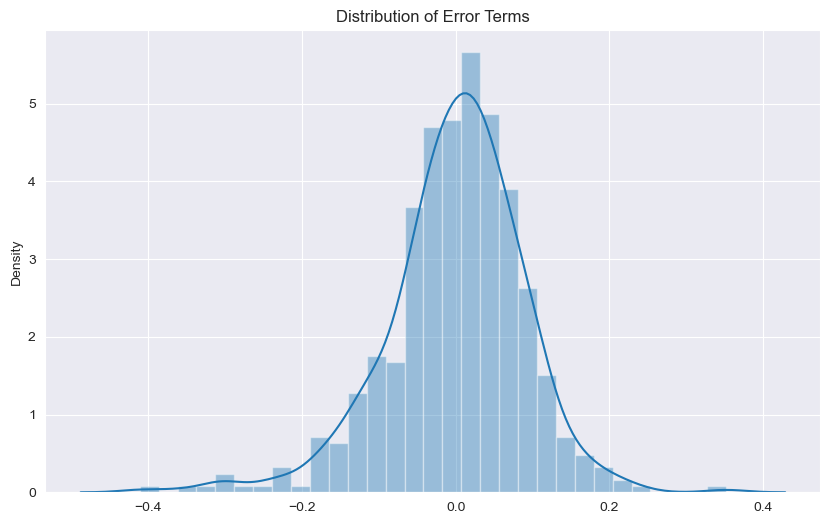

In [67]:
# Plotting of Residuals
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(resid)
plt.title("Distribution of Error Terms")
plt.show()

• Here, the error terms are normally distributed and centred at 0. Hence, the (1) and (2) assumptions of the error terms are satisfied.

### e.Checking the patterns of the residuals

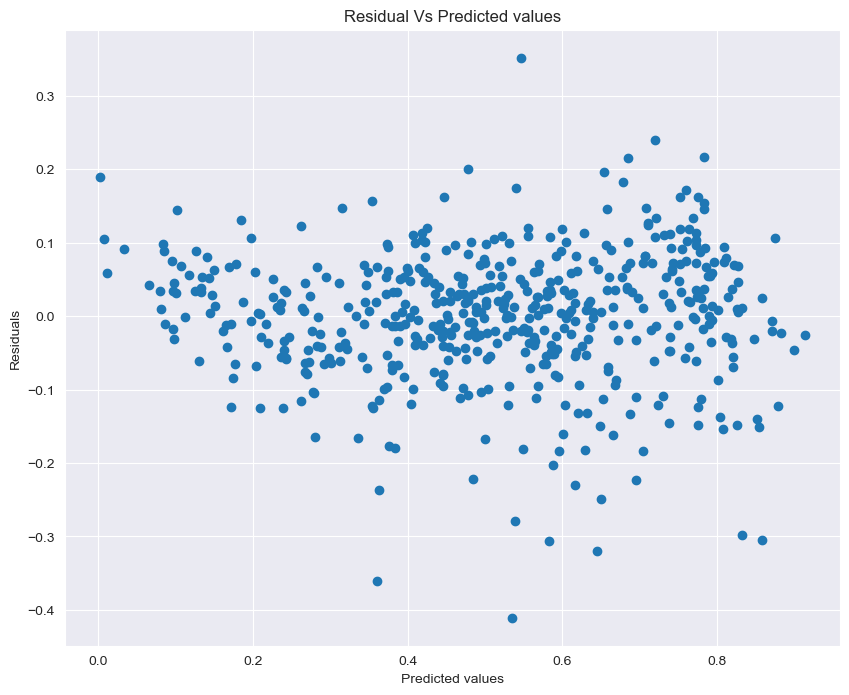

In [68]:
# Patterns of the residuals
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,resid)
plt.title("Residual Vs Predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

 • No distinct patterns are seen in the above figure. Hence, the error terms are independent with each other

### f.Checking for constant variance

The other assumptions of error terms is to have constant variance. Let's check

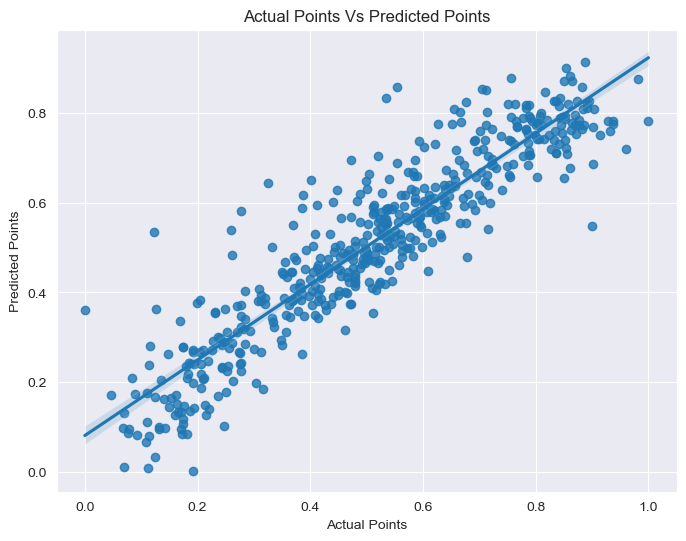

In [69]:
#checking for constant variance
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train,y=y_train_pred)
plt.title("Actual Points Vs Predicted Points")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.show()


From the above figure, it says that error terms have constant variance.

Hence, all the assumptions of error terms are satisfied.

## Step 7 : Test model predictions and Accuracy

### a. Making Predictions

#### Applying the scaling on test sets

In [70]:
#applying the scaling
num_vars=["temp","atemp","humidity","windspeed","count"]
df_test[num_vars]=scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [71]:
#X_test and y_test
X_test=df_test
y_test=df_test.pop("count")

In [72]:
#adding constant variable
X_test_sm=sm.add_constant(X_test)

In [73]:
#checking the columns
X_test_sm.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_2', 'season_3', 'season_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weather_1',
       'weather_2', 'weather_3'],
      dtype='object')

In [74]:
#drop the columns that are eliminated in the training process
X_test_sm=X_test_sm.drop(['workingday','atemp','month_2','month_4','month_5', 'month_6', 'month_7','month_11', 'month_12','weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6','weather_1','season_3','month_3'],axis=1)


In [75]:
# Predict the value of count using the trained model
y_test_pred=lm_3.predict(X_test_sm)

In [76]:
# Checking the rows of y_test_pred
y_test_pred.head()

184    0.398766
535    0.913227
299    0.414491
221    0.623354
152    0.621752
dtype: float64

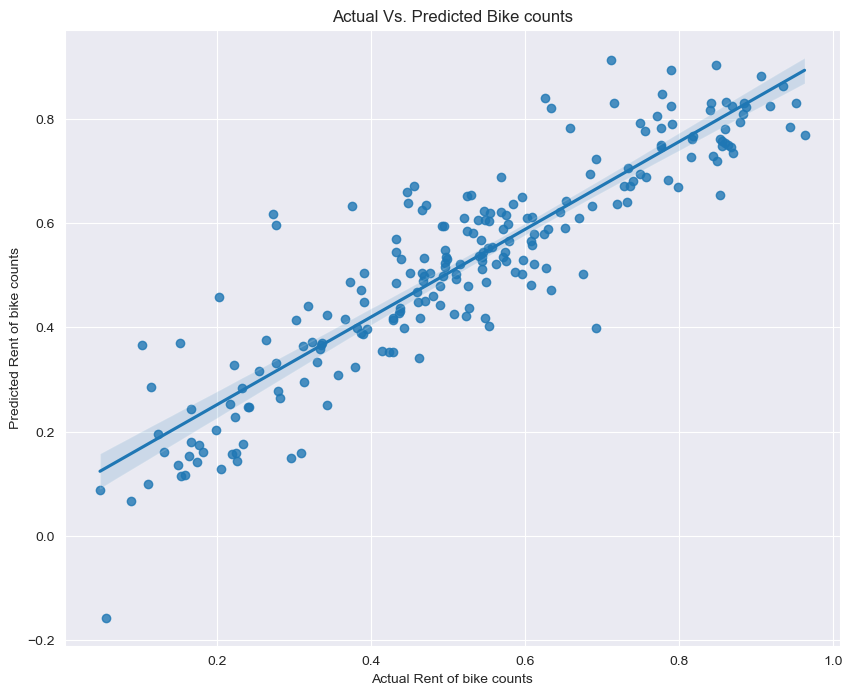

In [77]:
# Plot y_test and y_test_pred
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x=y_test,y=y_test_pred)
plt.title("Actual Vs. Predicted Bike counts")
plt.xlabel("Actual Rent of bike counts")
plt.ylabel("Predicted Rent of bike counts")
plt.show()


### b. Accuracy of the test model

In [78]:
# Checking r2
r2=r2_score(y_test,y_test_pred)

In [79]:
r2

0.8116537323246351

In [80]:
# Checking the coefficient values
coeff=round(lm_3.params,2)
beta_coff=coeff.sort_values(ascending=False)
beta_coff

temp         0.53
const        0.24
year         0.23
season_4     0.14
month_9      0.13
season_2     0.11
month_8      0.06
month_10     0.04
weather_2   -0.05
holiday     -0.09
humidity    -0.18
windspeed   -0.19
weather_3   -0.24
dtype: float64

### c. Equation of best line:

### d. Results and Interpretations

#### RESULTS

### Interpretations